# Cluster Analysis with KMeans

Clustering

**Pros:**
1. Simple to understand
2. Faster to cluster
3. Widely available
4. Easy to implement
5. Always yields a result*
6. Can we used in exploratory data analysis to identify possible Ommitted Variable Bias (OVB)

**Cons:**
1. We need to pick K (Remedy is to use the Elbow Method)
2. KMeans is sensitive to initialization (takes the closest points to the seeds (Remedy: k-means++). By default, kmeans applies k-means++
3. Sensitive to outliers. If there is a single point that is an outlier, it almost always assingns it as its own cluster (Remedy: get rid of outliers and cluster again).
4. KMeans produces spherical solutions. Euclidian distance from centroid is why sphere shapes happen.
5. Standardization: Aim of it is to reduce the weight of higher numbers and increase that of lower ones. Scale matters, every rectangle turns into a square in standardization. It is good practice to standardizing data before clustering.

**When not to standardize:** If we know one feature is more important than the others, we SHOULD NOT standardize.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

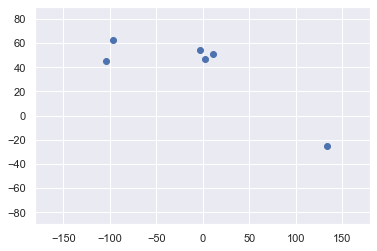

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Map the Data

We will label the Language feature

In [5]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

**data.iloc[row indices, column indices]** 
slices the dataframe, given rows and columns to be kept

In [6]:
x = data_mapped.iloc[:,1:3]


In [7]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

**KMeans([number])** Number parameter stands for how many clusters

**Kmeans.fit()** applys k-means clustering to input data

**KMeans.fit_predict()** creates an array with the identified clusters of the input data


In [8]:
kmeans = KMeans(2)

In [9]:
kmeans.fit(x).get_params()

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Clustering Results (Lat-Long)

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 1])

In [11]:
id_clusters = data_mapped.copy()
id_clusters['Lat-Long Cluster'] = identified_clusters
id_clusters

,Country,Latitude,Longitude,Language,Lat-Long Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


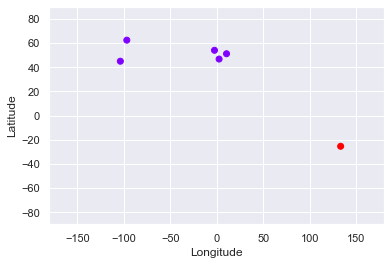

In [12]:
plt.scatter(id_clusters['Longitude'],id_clusters['Latitude'],c=id_clusters['Lat-Long Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.show()

The cluster data serves as the colored labels for the clustered set
in matplotlib, we have c=[variable] that allows us to denote the point (x,y) as the output label of KMeans

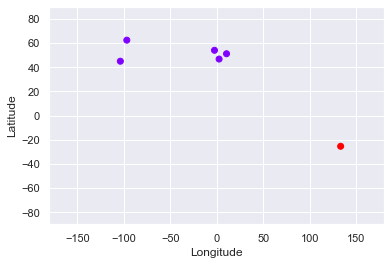

In [13]:
plt.scatter(id_clusters['Longitude'],id_clusters['Latitude'],c=id_clusters['Lat-Long Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

**Within Cluster Sum of Squares (WCSS):** Measure developed within the ANOVA framework, if we minimize WCSS, we have reached the perfect clustering solution.

We do not really want WCSS to be minimzed; we want it to be as minimized as possible without reaching 0 or Max thresholds as the middle ground offers the most value. 

**The Elbow Method:** Graphical representation of Within-Cluster Sum of Squares vs Number of clusters

In [14]:
kmeans.inertia_

13205.758119999999

In [15]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [16]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

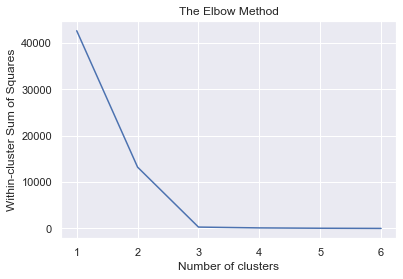

In [17]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

# Types of Clustering

Flat: K-Means Clustering

**Hierarchical (Hierarchy of Clusters):** Was developed first. An example is the Taxonomy of the Animal Kingdom. 
**Types of Hierarchical Clustering:** Agglomerative (Bottom-Up) and Divisive (Top-Down). Agglomerative Hierarchical Clustering is easier to mathematically tackle.
**Dendrograms:** all clusters ladder up into one cluster eventually. The bigger the distance between two lengths, the bigger the difference between the chosen features. The distance betwen the links of a dendogram shows similarities or dissimilarities bewteen clusters.

**Pros:** 
1. Hierarchical Clustering shows all possible linkages between clusters
2. We understand the data much better
3. No need to preset the numbe rof clusters (like with K-Means)
4. Many methods to perform hierarchical clustering (Ward Method)

**Cons:**
1. Scalability (like 1000 observations) - computationally expensive

Decision Trees? 

## HeatMaps with Seaborn|

In [22]:
data = pd.read_csv('Country clusters standardized.csv', index_col='Country')

In [25]:
x_scaled = data.copy()
x_scaled = x_scaled.drop('Language',axis=1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


### Plot the Data

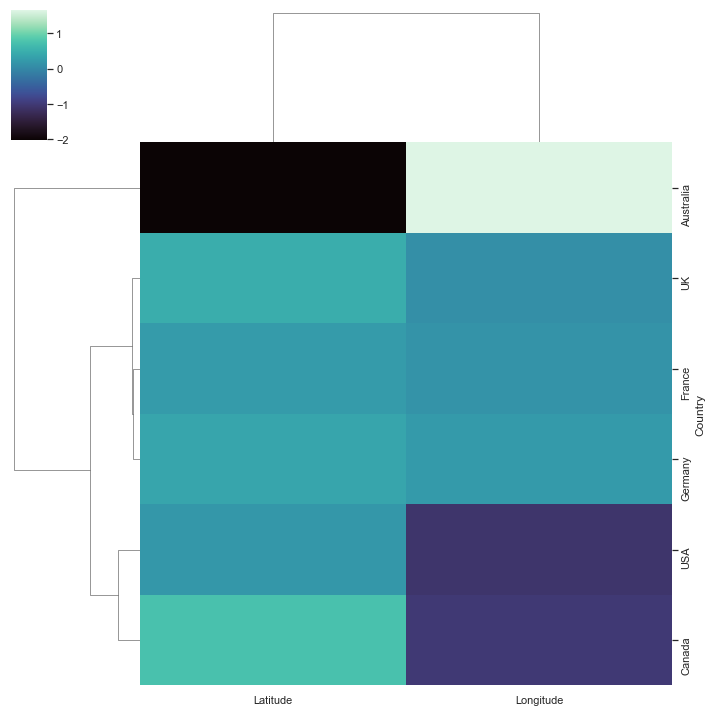

In [27]:
sns.clustermap(x_scaled, cmap='mako')

Left side is the dendrogram, while the top is a dendrogram of the features. As noticed, the latitude is very closer to each other for all of the countries while Australia's latitude falls very differently.

For longitude, North American countries (Canada and USA) appear similar in color; likewise with European countries (Germany, France, UK) and Australia is very different (thus the different color).

In [54]:
data = pd.read_csv('PacificBankofNewYork.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

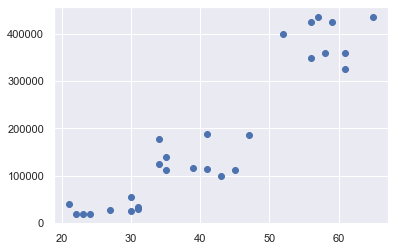

In [55]:
plt.scatter(data['Customer Age'], data['Balance'])
plt.show

In [56]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-1.51516458, -0.95264002],
       [-1.44073544, -1.09099956],
       [-1.3663063 , -1.08348862],
       [-1.29187717, -1.08922066],
       [-1.06858975, -1.03170262],
       [-0.84530234, -0.84649849],
       [-0.77087321, -1.01852552],
       [-0.77087321, -0.99223721],
       [-0.84530234, -1.04657956],
       [-0.47315666, -0.29861448],
       [-0.54758579, -0.03523721],
       [-0.54758579, -0.38772461],
       [-0.47315666, -0.47167591],
       [-0.17544011, -0.44532171],
       [-0.02658183,  0.02246531],
       [-0.02658183, -0.45191026],
       [ 0.12227644, -0.55075827],
       [ 0.27113471, -0.47167591],
       [ 0.41999299,  0.01124501],
       [ 0.79213867,  1.42412651],
       [ 1.08985522,  1.07944654],
       [ 1.08985522,  1.58130295],
       [ 1.16428436,  1.65510788],
       [ 1.2387135 ,  1.15984661],
       [ 1.31314263,  1.58884025],
       [ 1.46200091,  0.93144795],
       [ 1.46200091,  1.15042499],
       [ 1.75971746,  1.66055661]])

In [57]:
kmeans = KMeans(3)

In [58]:
kmeans.fit(x_scaled).get_params()

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [59]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [61]:
id_clusters = data.copy()
id_clusters['Age-Balance Cluster'] = identified_clusters
id_clusters

,Customer Age,Balance,Age-Balance Cluster
0,21,39258,0
1,22,18258,0
2,23,19398,0
3,24,18528,0
4,27,27258,0
5,30,55368,0
6,31,29258,0
7,31,33248,0
8,30,25000,0
9,35,138525,2


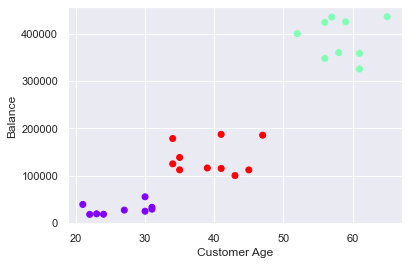

In [62]:
plt.scatter(id_clusters['Customer Age'],id_clusters['Balance'],c=id_clusters['Age-Balance Cluster'],cmap='rainbow')
plt.xlabel("Customer Age")
plt.ylabel("Balance")
plt.show()

In [63]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[56.00000000000001,
 10.329613110555977,
 3.619608526968246,
 2.729339079223474,
 2.0633467505281287,
 1.489223720597134,
 1.119601569314529,
 0.7639470118972281,
 0.62029457556464]

Text(0, 0.5, 'WCSS')

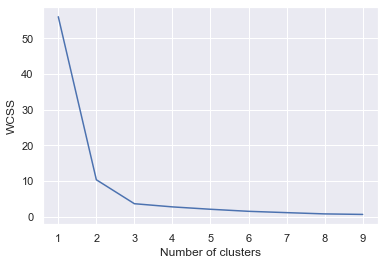

In [64]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
for i in range(1,6):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.intertia)